In [ ]:
!pip install shap

In [ ]:
!pip install eli5

In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy import linalg

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/XAI/automobile.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         6019 non-null   float64
 1   Make          6019 non-null   object 
 2   Location      6019 non-null   object 
 3   Age           6019 non-null   int64  
 4   Odometer      6019 non-null   int64  
 5   FuelType      6019 non-null   object 
 6   Transmission  6019 non-null   object 
 7   OwnerType     6019 non-null   object 
 8   Mileage       6019 non-null   object 
 9   EngineCC      6019 non-null   object 
 10  PowerBhp      6019 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 517.4+ KB


In [10]:
df.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,PowerBhp
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.6,998,58.16
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582,126.2
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.2,1199,88.7
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248,88.76
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.2,1968,140.8


<ipython-input-11-5e080168c38c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Price)


<Axes: xlabel='Price', ylabel='Density'>

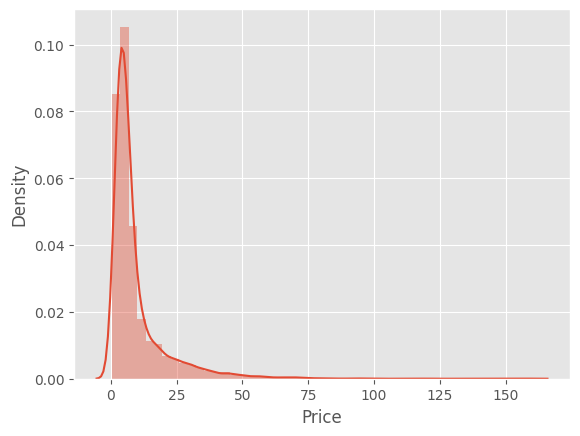

In [11]:
sns.distplot(df.Price)

<ipython-input-12-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

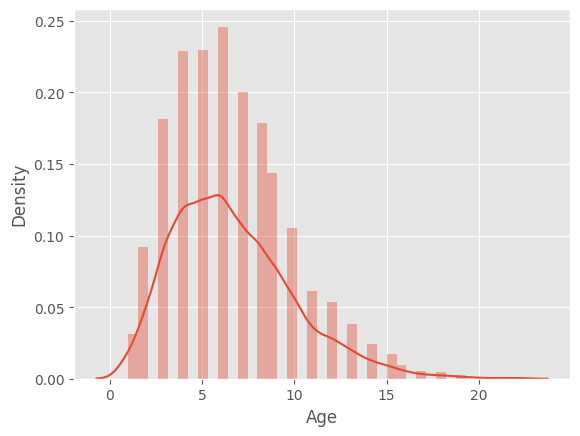

In [12]:
sns.distplot(df.Age)

<Axes: xlabel='Age', ylabel='Price'>

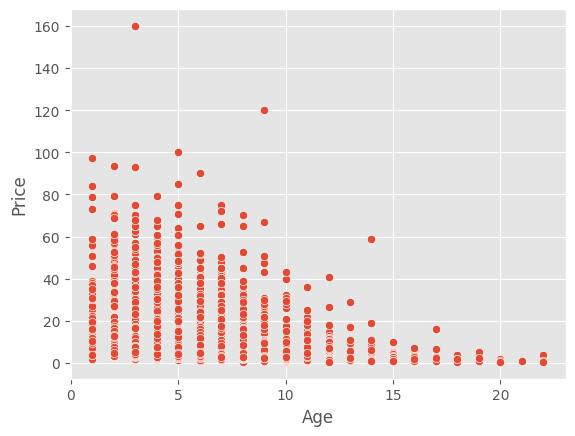

In [13]:
sns.scatterplot(x=df.Age,y=df.Price)

In [14]:
df.Make.value_counts()

marutiswift         353
hondacity           270
hyundaii20          247
hyundaiverna        170
hyundaii10          156
                   ... 
volkswagentiguan      1
fiatpetra             1
volkswagenbeetle      1
porscheboxster        1
jaguarf               1
Name: Make, Length: 217, dtype: int64

In [15]:
df.Make.value_counts()/df.shape[0]

marutiswift         0.058648
hondacity           0.044858
hyundaii20          0.041037
hyundaiverna        0.028244
hyundaii10          0.025918
                      ...   
volkswagentiguan    0.000166
fiatpetra           0.000166
volkswagenbeetle    0.000166
porscheboxster      0.000166
jaguarf             0.000166
Name: Make, Length: 217, dtype: float64

In [19]:
df = DataFrame(df)

In [23]:
df['Mileage'] = pd.to_numeric(df.Mileage.replace('+AC0-1', '0'))
df['EngineCC'] = pd.to_numeric(df.EngineCC.replace('+AC0-1', '0'))
df['PowerBhp'] = pd.to_numeric(df.PowerBhp.replace('+AC0-1', '0'))

In [24]:
df(df[['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp']]).corr()

TypeError: ignored

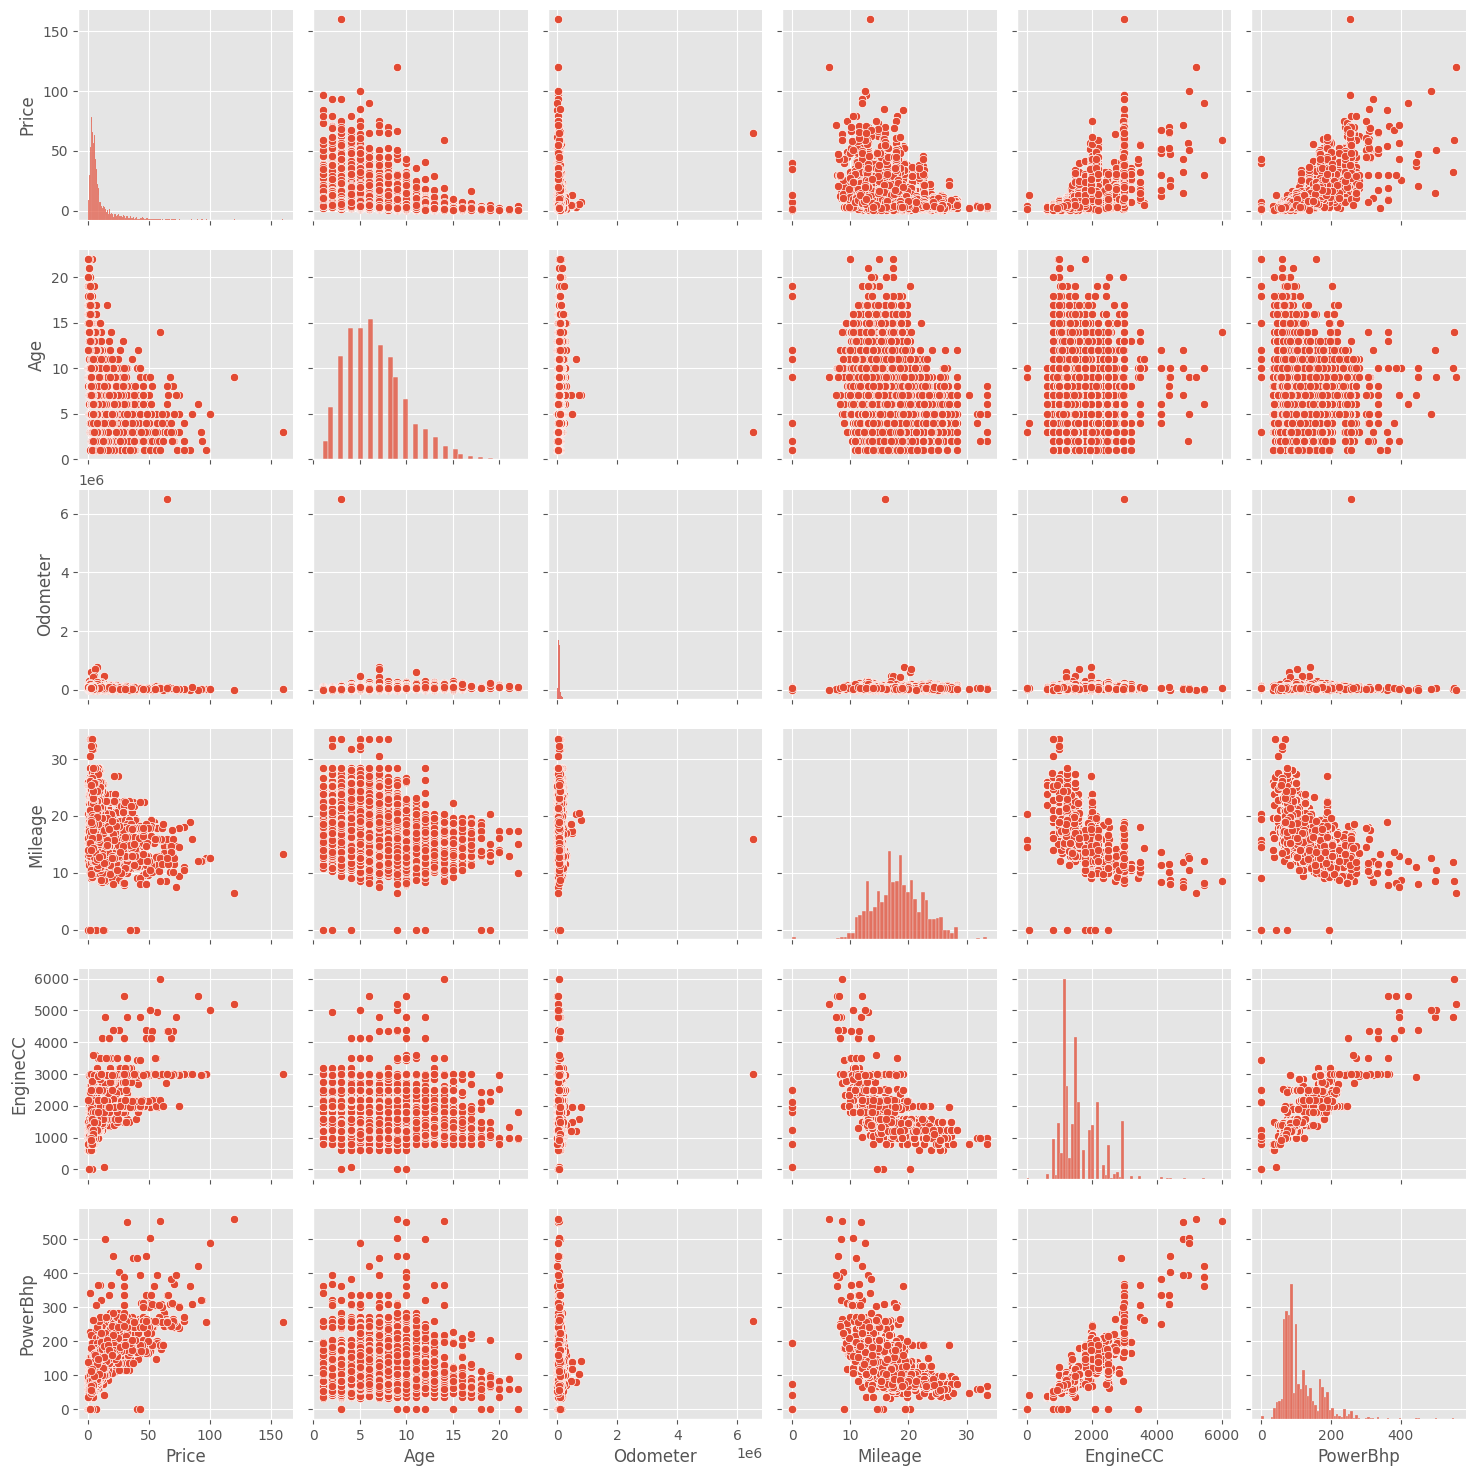

In [25]:
sns.pairplot(df[['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp']])

In [26]:
corrl = (df[['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp']]).corr()

<ipython-input-26-7855c46f3488>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp']]).corr()


In [27]:
corrl

,Price,Age,Odometer,Mileage,EngineCC,PowerBhp
Price,1.000000,-0.305327,-0.011493,-0.333860,0.658725,0.768287
Age,-0.305327,1.000000,0.173048,-0.294649,0.049870,-0.038800
Odometer,-0.011493,0.173048,1.000000,-0.063420,0.090783,0.031307
Mileage,-0.333860,-0.294649,-0.063420,1.000000,-0.631389,-0.528108
EngineCC,0.658725,0.049870,0.090783,-0.631389,1.000000,0.860649
PowerBhp,0.768287,-0.038800,0.031307,-0.528108,0.860649,1.000000


In [29]:
corrl.style.background_gradient(cmap='coolwarm')

,Price,Age,Odometer,Mileage,EngineCC,PowerBhp
Price,1.000000,-0.305327,-0.011493,-0.333860,0.658725,0.768287
Age,-0.305327,1.000000,0.173048,-0.294649,0.049870,-0.038800
Odometer,-0.011493,0.173048,1.000000,-0.063420,0.090783,0.031307
Mileage,-0.333860,-0.294649,-0.063420,1.000000,-0.631389,-0.528108
EngineCC,0.658725,0.049870,0.090783,-0.631389,1.000000,0.860649
PowerBhp,0.768287,-0.038800,0.031307,-0.528108,0.860649,1.000000


In [30]:
np.where(
    (df[['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp']]).corr() > 0.6,
    'Yes','No'
)

<ipython-input-30-28ee2feba104>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Transmission', 'OwnerType', 'Mileage', 'EngineCC', 'PowerBhp']]).corr() > 0.6,


array([['Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
       ['No', 'Yes', 'No', 'No', 'No', 'No'],
       ['No', 'No', 'Yes', 'No', 'No', 'No'],
       ['No', 'No', 'No', 'Yes', 'No', 'No'],
       ['Yes', 'No', 'No', 'No', 'Yes', 'Yes'],
       ['Yes', 'No', 'No', 'No', 'Yes', 'Yes']], dtype='<U3')

In [31]:
Location_dummy = pd.get_dummies(df.Location,prefix='Location',drop_first=True)

In [32]:
FuelType_dummy = pd.get_dummies(df.FuelType,prefix='FuelType',drop_first=True)

In [33]:
Transmission_dummy = pd.get_dummies(df.Transmission,prefix='Transmission',drop_first=True)

In [34]:
OwnerType_dummy = pd.get_dummies(df.OwnerType,prefix='OwnerType',drop_first=True)

In [45]:
Mileage_dummy = pd.get_dummies(df.Mileage,prefix='Mileage',drop_first=True)

In [47]:
combine_all_dummy = pd.concat([df,Location_dummy,FuelType_dummy,Transmission_dummy,OwnerType_dummy,Mileage_dummy],axis=1)

In [48]:
combine_all_dummy.head()

,Price,Make,Location,Age,Odometer,FuelType,Transmission,OwnerType,Mileage,EngineCC,...,Mileage_27.39,Mileage_27.4,Mileage_27.62,Mileage_28.09,Mileage_28.4,Mileage_30.46,Mileage_31.79,Mileage_32.26,Mileage_33.44,Mileage_33.54
0,1.75,marutiwagonr,Mumbai,10,72000,CNG,Manual,First,26.60,998.0,...,0,0,0,0,0,0,0,0,0,0
1,12.50,hyundaicreta,Pune,5,41000,Diesel,Manual,First,19.67,1582.0,...,0,0,0,0,0,0,0,0,0,0
2,4.50,hondajazz,Chennai,9,46000,Petrol,Manual,First,18.20,1199.0,...,0,0,0,0,0,0,0,0,0,0
3,6.00,marutiertiga,Chennai,8,87000,Diesel,Manual,First,20.77,1248.0,...,0,0,0,0,0,0,0,0,0,0
4,17.74,audia4,Coimbatore,7,40670,Diesel,Automatic,Second,15.20,1968.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
combine_all_dummy.columns

Index(['Price', 'Make', 'Location', 'Age', 'Odometer', 'FuelType',
       'Transmission', 'OwnerType', 'Mileage', 'EngineCC',
       ...
       'Mileage_27.39', 'Mileage_27.4', 'Mileage_27.62', 'Mileage_28.09',
       'Mileage_28.4', 'Mileage_30.46', 'Mileage_31.79', 'Mileage_32.26',
       'Mileage_33.44', 'Mileage_33.54'],
      dtype='object', length=466)

In [50]:
clean_df = combine_all_dummy.drop(columns=['Make','Location','FuelType','Transmission','OwnerType','Mileage', 'EngineCC', 'PowerBhp'])

In [51]:
clean_df.columns

Index(['Price', 'Age', 'Odometer', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi',
       ...
       'Mileage_27.39', 'Mileage_27.4', 'Mileage_27.62', 'Mileage_28.09',
       'Mileage_28.4', 'Mileage_30.46', 'Mileage_31.79', 'Mileage_32.26',
       'Mileage_33.44', 'Mileage_33.54'],
      dtype='object', length=458)

In [52]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Columns: 458 entries, Price to Mileage_33.54
dtypes: float64(1), int64(2), uint8(455)
memory usage: 2.7 MB


In [53]:
clean_df.columns

Index(['Price', 'Age', 'Odometer', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi',
       ...
       'Mileage_27.39', 'Mileage_27.4', 'Mileage_27.62', 'Mileage_28.09',
       'Mileage_28.4', 'Mileage_30.46', 'Mileage_31.79', 'Mileage_32.26',
       'Mileage_33.44', 'Mileage_33.54'],
      dtype='object', length=458)

In [56]:
#investigating the linear relationship
plt.plot(clean_df.mileage, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

AttributeError: ignored

Text(0.5, 1.0, 'Verify Linear Relationship')

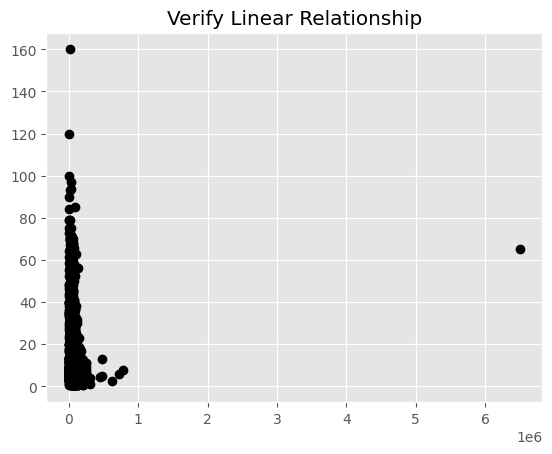

In [57]:
#understanding the linear relationship
plt.plot(clean_df.Odometer, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

Text(0.5, 1.0, 'Verify Linear Relationship')

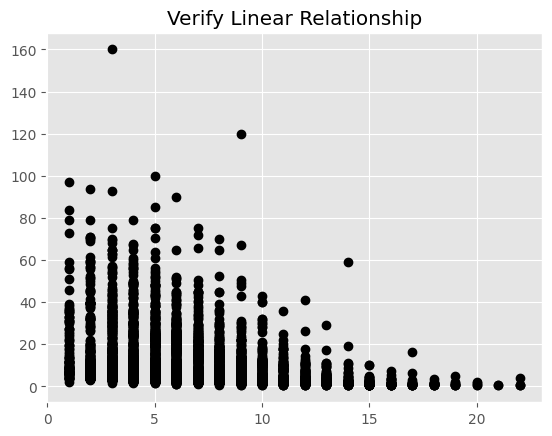

In [58]:
#understanding the linear relationship
plt.plot(clean_df.Age, clean_df.Price, 'o', color='black');
plt.title("Verify Linear Relationship")

<Axes: xlabel='Price', ylabel='Density'>

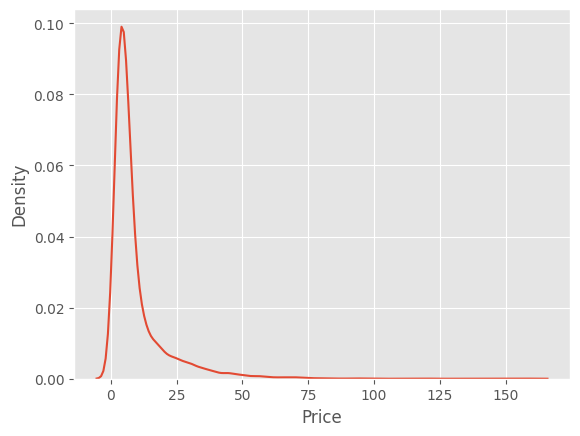

In [59]:
# All variables follow a normal distribution
sns.kdeplot(clean_df.Price)

In [60]:
# Q3 + 1.5*IQR
def find_outliers(x):
    IQR = x.describe()[6]-x.describe()[4] #Q3-Q1
    UCL = x.describe()[6] + 1.5*IQR # Q3+1.5*IQR
    LCL = x.describe()[4] - 1.5*IQR #Q1-1.5*IQR
    H_values = x[x > UCL] # outliers on the higher side
    L_values = x[x < LCL] #outliers on the lower side
    return(len(H_values),len(L_values)) #number of outliers

In [61]:
find_outliers(clean_df.Price)

(718, 0)

<Axes: xlabel='Odometer', ylabel='Density'>

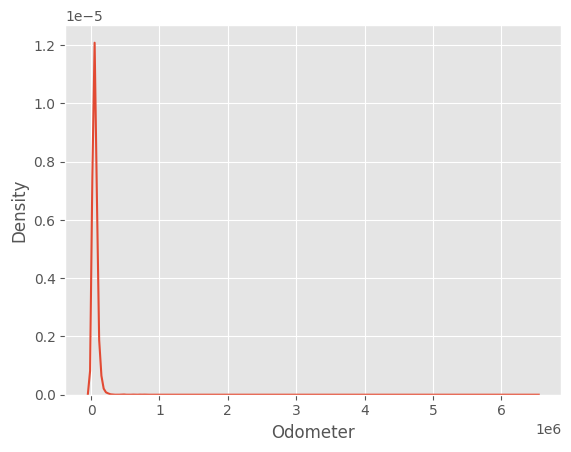

In [62]:
sns.kdeplot(clean_df.Odometer)

In [64]:
clean_df.dtypes

Price                 float64
Age                     int64
Odometer                int64
Location_Bangalore      uint8
Location_Chennai        uint8
                       ...   
Mileage_30.46           uint8
Mileage_31.79           uint8
Mileage_32.26           uint8
Mileage_33.44           uint8
Mileage_33.54           uint8
Length: 458, dtype: object

In [65]:
#split the dataset into training and testig
data_train, data_test = train_test_split(clean_df,test_size=0.25,random_state=1234)

In [66]:
data_train.shape,data_test.shape

((4514, 458), (1505, 458))

In [67]:
XTrain = np.array(data_train.iloc[:,0:(clean_df.shape[1]-1)])
YTrain = np.array(data_train['Price'])

In [68]:
XTest = np.array(data_test.iloc[:,0:(clean_df.shape[1]-1)])
YTest = np.array(data_test['Price'])

In [69]:
XTrain.shape, XTest.shape

((4514, 457), (1505, 457))

In [70]:
#multiple linear regression model
reg = linear_model.LinearRegression()
reg

LinearRegression()

In [71]:
reg.fit(XTrain,YTrain) #training the model

LinearRegression()

In [72]:
print('Coefficients: \n', np.round(reg.coef_,4))

Coefficients: 
 [ 1.  0.  0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0. -0. -0. -0.
  0. -0. -0. -0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0.
  0.  0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0.
 -0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0. -0. -0.
 -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0. -0. -0.  0.
  0.  0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0.  0.  0.
 -0. -0. -0.  0.  0. -0.  0. -0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0.
  0. -0.  0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0.
  0. -0.  0. -0. -0. -0. -0. -0.  0. -0.  0. -0.  0. -0. -0.  0.  0.  0.
 -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  0.
  0. -0.  0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0.  0.
  0.  0.  0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0.  0. -0. -0. -0. -0.
  0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0. -0. -0.
 -0.  0. -0. -0. -0.  0. -0.  0.  0

In [73]:
print('Intercept: \n', np.round(reg.intercept_,0))

Intercept: 
 -0.0


In [75]:
reg.score(XTrain,YTrain) # R-square value from the trained model

1.0

In [76]:
reg.score(XTest,YTest) # R-square value from the test set

1.0

In [77]:
from scipy import stats

In [78]:
import statsmodels.api as sm

In [80]:
y = np.array(clean_df['Price'])
xx = np.array(clean_df[['Price', 'Age', 'Odometer',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'FuelType_Diesel', 'FuelType_Electric', 'FuelType_LPG',
       'FuelType_Petrol', 'Transmission_Manual',
       'OwnerType_Fourth +ACY- Above', 'OwnerType_Second', 'OwnerType_Third']])

In [81]:
mod = sm.OLS(y, xx)

results = mod.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.000e+27
Date:                Sun, 24 Sep 2023   Prob (F-statistic):                        0.00
Time:                        10:40:35   Log-Likelihood:                      1.4869e+05
No. Observations:                6019   AIC:                                 -2.973e+05
Df Residuals:                    5998   BIC:                                 -2.972e+05
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [82]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  [ 1.00000000e+00  1.15799568e-16 -4.16827556e-17  1.41173965e-15
  1.53566396e-15  3.69702099e-15  1.28559273e-15  1.07639592e-15
  2.29243707e-15  3.64926188e-15  1.67747760e-15  8.45718352e-16
  2.42980549e-15 -2.59357423e-15  3.50804455e-15 -2.55958449e-15
 -2.26793410e-15 -9.95839695e-16 -1.68463334e-15 -6.79577922e-16
 -2.15116553e-15]
R2:  1.0
Parameters:  [ 1.00000000e+00  1.15799568e-16 -4.16827556e-17  1.41173965e-15
  1.53566396e-15  3.69702099e-15  1.28559273e-15  1.07639592e-15
  2.29243707e-15  3.64926188e-15  1.67747760e-15  8.45718352e-16
  2.42980549e-15 -2.59357423e-15  3.50804455e-15 -2.55958449e-15
 -2.26793410e-15 -9.95839695e-16 -1.68463334e-15 -6.79577922e-16
 -2.15116553e-15]
Standard errors:  [6.98784644e-15 2.12853805e-14 6.59927495e-19 3.69702277e-13
 3.47874680e-13 3.33001590e-13 3.34097660e-13 3.25397334e-13
 3.58835669e-13 3.27754006e-13 3.41540090e-13 3.16203269e-13
 3.30027327e-13 3.32846495e-13 3.22192791e-12 1.47748495e-12
 3.32544180e-13 1

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
y = clean_df['Price']
x = clean_df.drop(['Price','FuelType_Diesel'],axis=1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1234)

xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

new_model = LinearRegression()

new_model.fit(xtrain,ytrain)

print(new_model.score(xtrain,ytrain))

print(new_model.score(xtest,ytest))

0.7781244735519957
0.748949480556595


In [91]:
resultsDF = pd.DataFrame()
resultsDF['Variables'] = pd.Series(xtrain.columns)
resultsDF['coefficients'] = pd.Series(np.round(new_model.coef_,2))
resultsDF.sort_values(by='coefficients',ascending=False)

,Variables,coefficients
19,Mileage_6.4,106.06
96,Mileage_12.65,59.05
118,Mileage_13.33,56.39
20,Mileage_7.5,51.17
149,Mileage_14.47,50.37
...,...,...
344,Mileage_20.65,-15.78
314,Mileage_19.63,-15.88
421,Mileage_25.0,-15.88
362,Mileage_21.21,-16.34


In [92]:
np.round(new_model.intercept_,2)

28.95

In [93]:
#adjusted R square
def AdjustedRSquare(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0) #sum of suare error
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0) # sum of square total
    R2 = 1- sse/sst #explained sum of squares
    adjR2 = R2-(1-R2)*(float(k)/(n-k-1))
    return adjR2, R2

In [94]:
from scipy import stats

In [95]:
def ReturnPValue(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    x = np.hstack((np.ones((n,1)),np.matrix(X)))
    df = float(n-k-1)
    sampleVar = sse/df
    sampleVarianceX = x.T*x
    covarianceMatrix = linalg.sqrtm(sampleVar*sampleVarianceX.I)
    se = covarianceMatrix.diagonal()[1:]
    betasTstat = np.zeros(len(se))
    for i in range(len(se)):
        betasTstat[i] = model.coef_[i]/se[i]
    betasPvalue = 1- stats.t.cdf(abs(betasTstat),df)
    return betasPvalue

In [96]:
resultsDF['p_value'] = pd.Series(np.round(ReturnPValue(new_model,xtrain,ytrain),2))
resultsDF.sort_values(by='coefficients',ascending=False)

LinAlgError: ignored

In [97]:
reg.adjR2, reg.R2 = AdjustedRSquare(new_model,xtrain,ytrain)
print (reg.adjR2, reg.R2)

0.753186036268217 0.7781244735519957


In [98]:
def ErrorMetric(model,X,Y):
    Yhat = model.predict(X)
    MAPE = np.mean(abs(Y-Yhat)/Y)*100
    MSSE = np.mean(np.square(Y-Yhat))
    Error = sns.distplot(Y-Yhat)
    return MAPE, MSSE, Error

<ipython-input-98-ab9f85e105a6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Error = sns.distplot(Y-Yhat)


(52.740590032531124,
 27.68007247446949,
 <Axes: xlabel='Price', ylabel='Density'>)

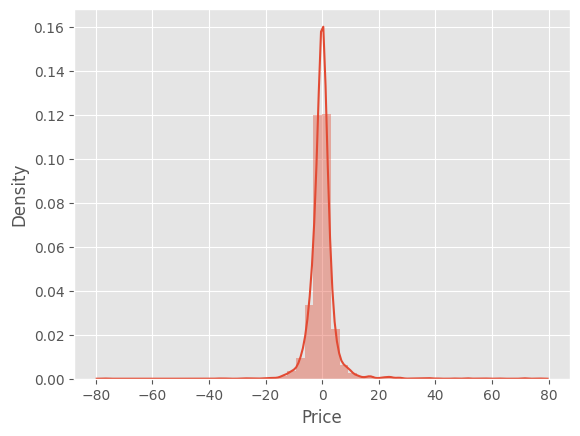

In [99]:
ErrorMetric(new_model,xtrain,ytrain)

<ipython-input-98-ab9f85e105a6>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Error = sns.distplot(Y-Yhat)


(68.84258736731962,
 31.709226971450672,
 <Axes: xlabel='Price', ylabel='Density'>)

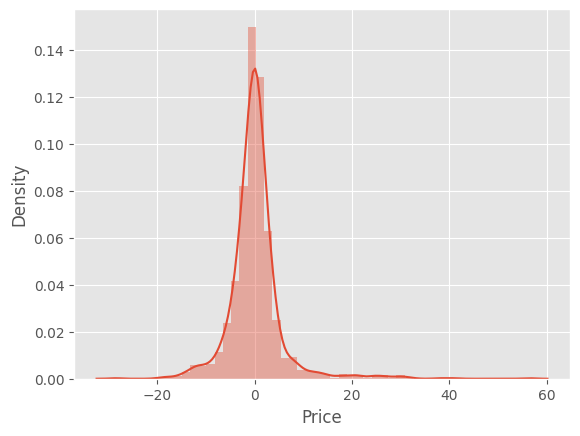

In [100]:
ErrorMetric(new_model,xtest,ytest)

In [101]:
Yhat = new_model.predict(xtest)
Y = ytest
sns.scatterplot(Y,Yhat)

TypeError: ignored

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


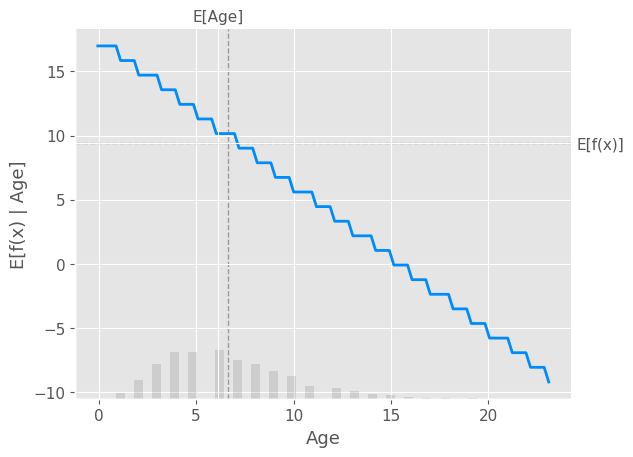

In [102]:
import shap
shap.plots.partial_dependence("Age", new_model.predict,xtrain, ice=False, model_expected_value=True,
                              feature_expected_value=True)

In [103]:
# compute the SHAP values for the linear model
background = shap.maskers.Independent(xtrain, max_samples=2000)
background

In [104]:
xtrain.shape

(4514, 456)

In [105]:
explainer = shap.Explainer(new_model, background)
explainer

In [106]:
shap_values = explainer(xtrain)
shap_values

.values =
array([[ 4.24376822e+00,  4.04962428e-02, -1.45972169e-01, ...,
         7.20639560e-03, -0.00000000e+00,  5.87478958e-03],
       [-1.45103615e+00,  3.73423867e-03, -1.45972169e-01, ...,
         7.20639560e-03, -0.00000000e+00,  5.87478958e-03],
       [-1.45103615e+00, -2.85708931e-03, -1.45972169e-01, ...,
         7.20639560e-03, -0.00000000e+00,  5.87478958e-03],
       ...,
       [-1.28406449e+01, -2.20985210e-02, -1.45972169e-01, ...,
         7.20639560e-03, -0.00000000e+00,  5.87478958e-03],
       [ 1.96584647e+00, -3.70020362e-02, -1.45972169e-01, ...,
         7.20639560e-03, -0.00000000e+00,  5.87478958e-03],
       [-3.12075280e-01, -8.18658634e-03, -1.45972169e-01, ...,
         7.20639560e-03, -0.00000000e+00,  5.87478958e-03]])

.base_values =
array([9.36268206, 9.36268206, 9.36268206, ..., 9.36268206, 9.36268206,
       9.36268206])

.data =
array([[     3,  22000,      0, ...,      0,      0,      0],
       [     8,  59000,      0, ...,      0,      0,  

(<Figure size 640x480 with 4 Axes>,
 <Axes: xlabel='Age', ylabel='E[f(x) | Age]'>)

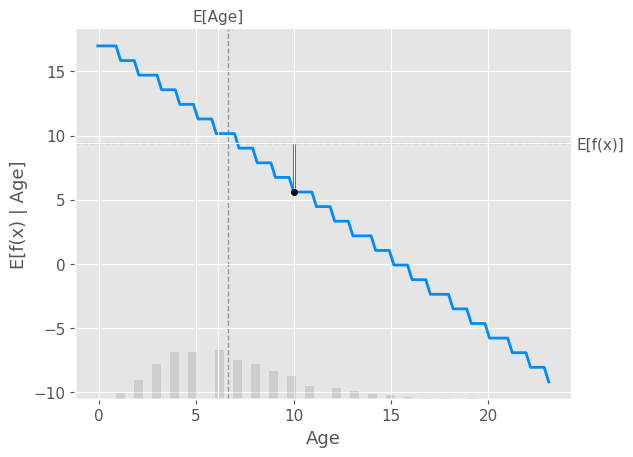

In [110]:
# make a standard partial dependence plot
sample_ind = 23
shap.plots.partial_dependence(
    "Age", new_model.predict, xtrain, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

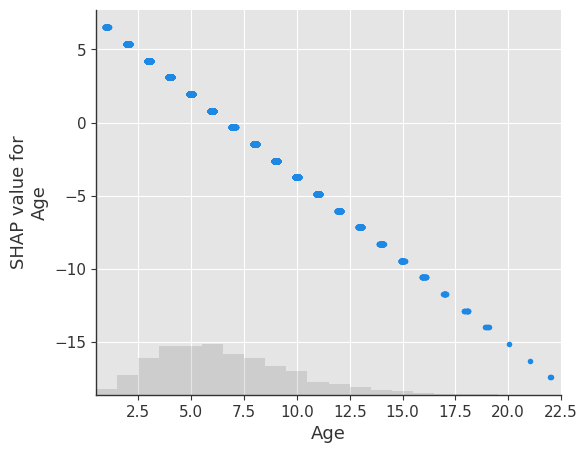

In [111]:
shap.plots.scatter(shap_values[:,"Age"])

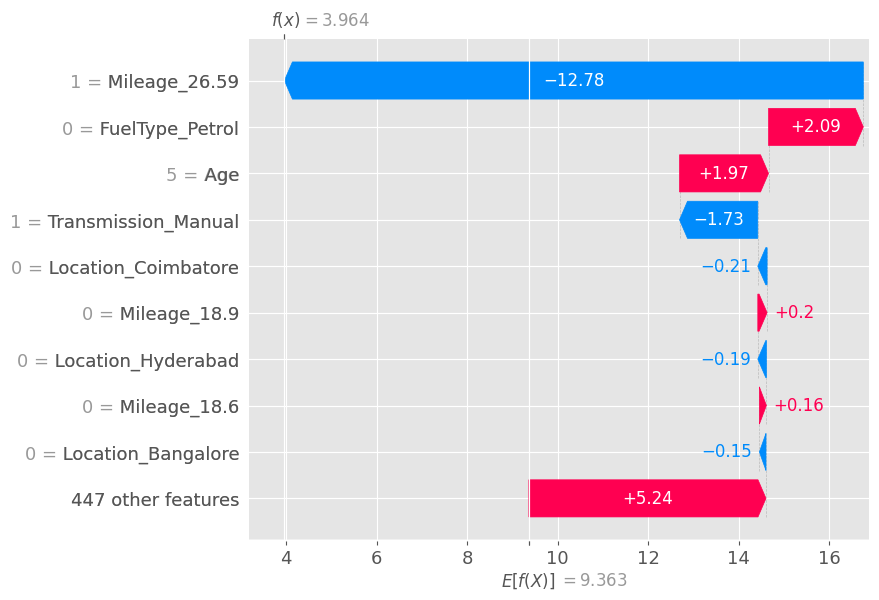

In [112]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[60])